# **FOREWORD**

This is an EDA and baseline kernel aimed to understand the dataset better and initialize our approach for the competition. <br>

This kernel is for the Playground Season 5-Episode 1 challenge [here](https://www.kaggle.com/competitions/playground-series-s5e1). **Mean Absolute Percentage Error** is the metric here - this needs to be minimized. This competition requires us to forecast sales for a set of stores across countries over provided products in a 3-year period from 2017-2019. **Covid influence is of no value here as the test set preceeds the covid period**

We have a quite a few references for this competition as described [here](https://www.kaggle.com/competitions/playground-series-s5e1/discussion/554331). Important information on the public leaderboard is placed [here](https://www.kaggle.com/competitions/playground-series-s5e1/discussion/554338)



# **IMPORTS**

In [1]:
%%time 

!pip install -q -r /kaggle/input/playgrounds5e01-public-imports-v1/req_kaggle.txt

exec(open(f"/kaggle/input/playgrounds5e01-public-imports-v1/myimports.py", "r").read())
exec(open(f"/kaggle/input/playgrounds5e01-public-imports-v1/mypp.py", "r").read())
exec(open(f"/kaggle/input/playgrounds5e01-public-imports-v1/myutils.py", "r").read())
exec(open(f"/kaggle/input/playgrounds5e01-public-imports-v1/mytraining.py", "r").read())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.3/32.3 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
ydata-profiling 4.12.1 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.

---> 1. General libraries
---> 2. Data wrangling libraries
---> 3. ML model libraries
---> 4. Optuna tuning
---> 5. Plotting global settings and color pri

# **CONFIGURATION**

In [2]:
%%time 

class CFG:
    """
    Configuration class for parameters and CV strategy for tuning and training
    Some parameters may be unused here as this is a general configuration class
    """;

    # Data preparation:-
    version_nb  = 1
    model_id    = "V1_4"
    model_label = "ML"

    test_req           = False
    test_sample_frac   = 0.01

    gpu_switch         = "OFF"
    state              = 42
    target             = f"num_sold"
    grouper            = f""
    tgt_mapper         = {}

    ip_path            = f"/kaggle/input/playground-series-s5e1"
    op_path            = f"/kaggle/working"
    orig_path          = f""

    dtl_preproc_req    = False
    ftre_plots_req     = False
    ftre_imp_req       = True

    nb_orig            = 0
    orig_all_folds     = False

    # Model Training:-
    pstprcs_oof        = True
    pstprcs_train      = True
    pstprcs_test       = True
    
    ML                 = False
    test_preds_req     = False

    pseudo_lbl_req     = "N"
    pseudolbl_up       = 0.975
    pseudolbl_low      = 0.00

    n_splits           = 3 if test_req == True else 5
    n_repeats          = 1
    nbrnd_erly_stp     = 50
    mdlcv_mthd         = 'KF'

    # Ensemble:-
    ensemble_req       = True
    optuna_req         = False
    metric_obj         = 'minimize'
    ntrials            = 10 if test_req == True else 300

    # Global variables for plotting:-
    grid_specs = {'visible'  : True,
                  'which'    : 'both',
                  'linestyle': '--',
                  'color'    : 'lightgrey',
                  'linewidth': 0.75
                 }

    title_specs = {'fontsize'   : 9,
                   'fontweight' : 'bold',
                   'color'      : '#992600',
                  }

PrintColor(f"\n---> Configuration done!\n")

cv_selector = \
{
 "RKF"   : RKF(n_splits = CFG.n_splits, n_repeats= CFG.n_repeats, random_state= CFG.state),
 "RSKF"  : RSKF(n_splits = CFG.n_splits, n_repeats= CFG.n_repeats, random_state= CFG.state),
 "SKF"   : SKF(n_splits = CFG.n_splits, shuffle = True, random_state= CFG.state),
 "KF"    : KFold(n_splits = CFG.n_splits, shuffle = True, random_state= CFG.state),
 "GKF"   : GKF(n_splits = CFG.n_splits)
}

collect()



---> Configuration done!

CPU times: user 170 ms, sys: 618 µs, total: 170 ms
Wall time: 169 ms


0

|Configuration parameter| Explanation| Data type| Sample values |  
| ---------------------- | ------------------------------- | --------------------- | --------------- |
| version_nb    | Version Number | int | 1 | 
| model_id      | Model ID    | string | V1_1 | 
| model_label   | Model Label | string | ML | 
| test_req      | Test Required| bool | True / False | 
| test_sample_frac| Test sampled fraction | int | 1000 |
| gpu_switch      | Do we need GPU support | bool | True / False |
| state           | Random state | int | 42 |
| target          | Target column | str |  |
| grouper         | CV grouper column | str |  |
| ip_path, op_path | Data paths  | str | |
| pstprcs_* | Do we need post-processing  | bool |True / False |
| ML| Do we need machine learning models  | bool |True / False |
| test_preds_req| Do we need test set predictions (training in inference kernel)  | bool |True / False |
| pseudo_lbl_req| Pseudo label required?  | bool |True / False |
| pseudo_lbl_* | Pseudo label cutoff | float | |
| n_splits/ n_repeats | N-splits and repeats for CV scheme | int | 3/5/10|
| nbrnd_erly_stp | Early stopping rounds | int | 40|
| mdlcv_mthd | Model CV method | str | RSKF|
| ensemble_req | Do we need ensemble | bool | True / False |
| optuna_req   | Do we need optuna | bool | True / False |
| metric_obj   | Metric direction | str | minimize/ maximize |
| ntrials      | Trials | int | 300 |

# **PREPROCESSING**

In [3]:
%%time 

pp = Preprocessor(2010, 2019)
pp.DoPreprocessing()

Data shape - train-test = (230130, 5) (98550, 4)

Train set head



Test set head


------------------------------ Data preprocessing ------------------------------


  0%|          | 0/6 [00:00<?, ?it/s]


Holiday distribution by year and month and country across the model period



IsHoliday0  IsHoliday1  IsHoliday2  IsHoliday3  IsHoliday4  \
date date                                                               
2010 1              1           2           2           1           1   
     2              0           0           0           0           0   
     4              1           3           3           2           4   
     5              0           3           1           1           5   
     6              0           2           1           1           0   
     7              1           0           0           0           0   
     8              0           0           1           0           0   
     9              1           0           0           0           0   
     10             0           0           0           1           0   
     11             0           1           1           0           0   
     12             2           4           3           5           2   
2011 1              2           2           2           1           1   
     2              0           0           0           0           0   
     3              0           0           1           0           0   
     4              1           3           2           2           4   
     5              0           1           1           2           2   
     6              0           4           1           1           3   
     7              1           0           0           0           0   
     8              0           0           1           0           0   
     9              1           0           0           0           0   
     10             0           0           0           1           0   
     11             0           1           1           0           0   
     12             2           4           3           4           2   
2012 1              2           2           2           2           1   
     4              1           3           3           2           4   
     5              0           3           1           1           4   
     6              0           2           1           1           0   
     7              1           0           0           0           0   
     8              0           0           1           0           0   
     9              1           0           0           0           0   
     10             0           0           0           1           0   
     11             0           1           1           0           0   
     12             1           4           3           3           2   
2013 1              1           2           2           1           1   
     2              0           0           0           0           0   
     3              1           2           1           1           3   
     4              0           1           2           1           1   
     5              0           3           1           1           5   
     6              0           2           1           1           0   
     7              1           0           0           0           0   
     8              0           0           1           0           0   
     9              1           0           0           0           0   
     10             0           0           0           2           0   
     11             0           1           1           0           0   
     12             1           4           3           3           2   
2014 1              1           2           2           1           1   
     2              0           0           0           0           0   
     4              1           3           3           2           4   
     5              0           2           1           1           3   
     6              0           3           1           2           2   
     7              1           0           0           0           0   
     8              0           0           1           0           0   
     9              1           0           0           0           0


Common holiday distribution by year and month and country across the model period



DatetimeIndex(['2010-01-01', '2010-12-25', '2011-01-01', '2011-12-25',
               '2011-12-26', '2012-01-01', '2012-12-25', '2013-01-01',
               '2013-12-25', '2014-01-01', '2014-12-25', '2015-01-01',
               '2015-12-25', '2016-01-01', '2016-12-25', '2016-12-26',
               '2017-01-01', '2017-12-25', '2018-01-01', '2018-12-25',
               '2019-01-01', '2019-12-25'],
              dtype='datetime64[ns]', name='date', freq=None)


Train-test set contents



CPU times: user 672 ms, sys: 123 ms, total: 795 ms
Wall time: 1.05 s


In [4]:
%%time

# Collecting the GDP figures
print()
gdp = GDPRequestor(country = pp.train.country.unique())
gdp_snp = gdp.ScrapGDP()
gdp_snp = \
gdp_snp.reset_index().\
melt(id_vars = ['index']).\
rename({'index': 'country', 'variable': 'year', 'value': 'GDP'}, axis=1)


---> Country = Canada
---> Country = Finland
---> Country = Italy
---> Country = Kenya
---> Country = Norway
---> Country = Singapore
CPU times: user 495 ms, sys: 40.9 ms, total: 535 ms
Wall time: 10.3 s


In [5]:
%%time 

display(
    pp.train[["country", "store", "product", CFG.target]].\
    groupby(["country", "store", "product"])[CFG.target].\
    apply(lambda x : x.isna().sum()).\
    reset_index().\
    style.\
    set_caption(
        f"Train data - null targets by country, store and product"
    ).
    applymap(
        lambda x : "color : blue; font-size : 16px ; font-weight: bold; border: dashed maroon 1.5px" 
        if x > 0 else "color : black; background-color : white",
        subset = [CFG.target]
    )
)

CPU times: user 91.3 ms, sys: 11 ms, total: 102 ms
Wall time: 102 ms


## **KEY NOTE**

We have records here from 2010-2019 through the train-test period across 6 countries, 3 stores and 5 products. Test data is across the last 3 years with the public test set in 2017.  <br>
We have quite a few nulls that need to be imputed for certain models. This is a potential EDA point that we could analyse here <br>
We next build combinations using country, store and product leading us to 6 x 3 x 5 combinations = 90 unique values. We then use these combinations to make our EDA <br>

In Canada and Kenya, Holographic goose product is always null across the Discount Stickers store. This is a major imputation assignment along with the other predictions as well. <br> 

This is the only difference between this competition and the past playground time series challenges. 

# **EDA**

In [6]:
%%time 

xform = \
ColumnTransformer([("E", OrdinalEncoder(dtype = np.int16), ['country', 'store', 'product'])
                  ],
                  verbose_feature_names_out = False,
                  remainder = "passthrough",
                 ).set_output(transform = "pandas")

train = xform.fit_transform(pp.train)
train['Ftre_Comb_Lbl'] = \
train['country'].astype(str) + train['store'].astype(str) + train['product'].astype(str)

# Developing a link between the encoded labels and the original column values:-
PrintColor(
    f"\nFeature combinations between encoded values and original feature labels\n"
)
display(
    train[['country', 'store', 'product', 'Ftre_Comb_Lbl']].drop_duplicates().T
)


df = \
pd.concat(
    [train.groupby(["Ftre_Comb_Lbl"])[CFG.target].apply(lambda x : x.isna().sum()),
     train.groupby(["Ftre_Comb_Lbl"])[CFG.target].count()
    ], 
    axis = 1
)

df.columns = ["Null_Count", "Count"]

print("\n\n\n")
display(
    df.loc[df.Count == 0].
    style.
    set_caption(f"Combinations with all null targets")
)


Feature combinations between encoded values and original feature labels



id              0    1    2    3    4    5    6    7    8    9    10   11  \
country          0    0    0    0    0    0    0    0    0    0    0    0   
store            0    0    0    0    0    2    2    2    2    2    1    1   
product          0    1    2    3    4    0    1    2    3    4    0    1   
Ftre_Comb_Lbl  000  001  002  003  004  020  021  022  023  024  010  011   

id              12   13   14   15   16   17   18   19   20   21   22   23  \
country          0    0    0    1    1    1    1    1    1    1    1    1   
store            1    1    1    0    0    0    0    0    2    2    2    2   
product          2    3    4    0    1    2    3    4    0    1    2    3   
Ftre_Comb_Lbl  012  013  014  100  101  102  103  104  120  121  122  123   

id              24   25   26   27   28   29   30   31   32   33   34   35  \
country          1    1    1    1    1    1    2    2    2    2    2    2   
store            2    1    1    1    1    1    0    0    0    0    0    2   
product          4    0    1    2    3    4    0    1    2    3    4    0   
Ftre_Comb_Lbl  124  110  111  112  113  114  200  201  202  203  204  220   

id              36   37   38   39   40   41   42   43   44   45   46   47  \
country          2    2    2    2    2    2    2    2    2    3    3    3   
store            2    2    2    2    1    1    1    1    1    0    0    0   
product          1    2    3    4    0    1    2    3    4    0    1    2   
Ftre_Comb_Lbl  221  222  223  224  210  211  212  213  214  300  301  302   

id              48   49   50   51   52   53   54   55   56   57   58   59  \
country          3    3    3    3    3    3    3    3    3    3    3    3   
store            0    0    2    2    2    2    2    1    1    1    1    1   
product          3    4    0    1    2    3    4    0    1    2    3    4   
Ftre_Comb_Lbl  303  304  320  321  322  323  324  310  311  312  313  314   

id              60   61   62   63   64   65   66   67   68   69   70   71  \
country          4    4    4    4    4    4    4    4    4    4    4    4   
store            0    0    0    0    0    2    2    2    2    2    1    1   
product          0    1    2    3    4    0    1    2    3    4    0    1   
Ftre_Comb_Lbl  400  401  402  403  404  420  421  422  423  424  410  411   

id              72   73   74   75   76   77   78   79   80   81   82   83  \
country          4    4    4    5    5    5    5    5    5    5    5    5   
store            1    1    1    0    0    0    0    0    2    2    2    2   
product          2    3    4    0    1    2    3    4    0    1    2    3   
Ftre_Comb_Lbl  412  413  414  500  501  502  503  504  520  521  522  523   

id              84   85   86   87   88   89  
country          5    5    5    5    5    5  
store            2    1    1    1    1    1  
product          4    0    1    2    3    4  
Ftre_Comb_Lbl  524  510  511  512  513  514

CPU times: user 544 ms, sys: 75.7 ms, total: 619 ms
Wall time: 617 ms


## **SALES PROFILING**

We build a sales profile table that aggregates the necessary sales volumes by date, country, store and product. We will use this as an input to our plots 

In [7]:
%%time 

# Converting the data into a pivot for further analysis:-
Sales_Prf = train.pivot(index= 'date', columns= 'Ftre_Comb_Lbl', values = CFG.target);

Sales_Prf.insert(0, 'Year', Sales_Prf.index.year)
Sales_Prf['Year'] = Sales_Prf['Year'].astype(np.uint16)

Sales_Prf.insert(1, 'Month', Sales_Prf.index.month)
Sales_Prf['Month'] = Sales_Prf['Month'].astype(np.int8)

Sales_Prf.insert(2, 'Day', Sales_Prf.index.day)
Sales_Prf['Day'] = Sales_Prf['Day'].astype(np.int8)

Sales_Prf.insert(3, 'WeekNb', Sales_Prf.index.isocalendar().week)
Sales_Prf['WeekNb'] = Sales_Prf['WeekNb'].astype(np.int8)

Sales_Prf.insert(4, 'DayNb',Sales_Prf.index.weekday)
Sales_Prf['DayNb'] = Sales_Prf['DayNb'].astype(np.int8)

Sales_Prf.insert(5, 'IsWeekend', np.where(Sales_Prf.DayNb >= 5, 1, 0))
Sales_Prf['IsWeekend'] = Sales_Prf['IsWeekend'].astype(np.int8)

# Merging the sales profile table with public holidays:-
Sales_Prf = pp.Holidays.merge(Sales_Prf, how = 'right', left_index= True, right_index= True)
Sales_Prf[pp.Holidays.columns] = Sales_Prf[pp.Holidays.columns].fillna(0.0).astype(np.int8)


if CFG.ftre_plots_req :
    # Displaying the pivot information:-
    PrintColor(
        f"\nComplete pivot table columns for sales across all combinations\n"
    )
    
    with np.printoptions(linewidth = 150, threshold = 1000):
        print(np.array(Sales_Prf.columns))

    PrintColor(f"\nSales Profile information\n")
    display(
        Sales_Prf.info(verbose = True)
    )

Sales_Prf.drop(["000", "300"], axis=1, errors = "ignore", inplace = True)

PrintColor(f"\nComplete combinations\n");
Cols = Sales_Prf.columns[13:]
display(Cols)


Complete combinations



Index(['001', '002', '003', '004', '010', '011', '012', '013', '014', '020',
       '021', '022', '023', '024', '100', '101', '102', '103', '104', '110',
       '111', '112', '113', '114', '120', '121', '122', '123', '124', '200',
       '201', '202', '203', '204', '210', '211', '212', '213', '214', '220',
       '221', '222', '223', '224', '301', '302', '303', '304', '310', '311',
       '312', '313', '314', '320', '321', '322', '323', '324', '400', '401',
       '402', '403', '404', '410', '411', '412', '413', '414', '420', '421',
       '422', '423', '424', '500', '501', '502', '503', '504', '510', '511',
       '512', '513', '514', '520', '521', '522', '523', '524'],
      dtype='object')

CPU times: user 66.3 ms, sys: 10.8 ms, total: 77.1 ms
Wall time: 80.9 ms


## **OVERALL SALES PLOT**

In [8]:
%%time

# Creating xticks for end of quarters with labels:-
Date_Labels             = pd.DataFrame(data= Sales_Prf.index[Sales_Prf.index.is_quarter_end])
Date_Labels['date_lbl'] = Date_Labels['date'].dt.year*100 + Date_Labels['date'].dt.month

CPU times: user 2.2 ms, sys: 29 µs, total: 2.23 ms
Wall time: 2.18 ms


In [9]:
%%time

def MakeGrpLinePlot(
    dtpart:str, 
    figsize= (20,96),
    Sales_Prf = Sales_Prf,
    Cols = Cols
):
        
    _ = Sales_Prf[['Year', dtpart] + list(Cols)]
    _.insert(0, 'Id', _['Year']* 100.0 + _[dtpart])
    _['Id'] = _['Id'].astype(np.int32).astype(str)
    _ = _.drop(['Year', dtpart], axis=1).groupby('Id').agg([np.sum])
    _.columns = [j+'_'+i for i, j in _.columns]

    combs = [str(i) + str(j) for i,j in list(product(range(0,6,1), [0,1,2]))]

    with sns.axes_style("white"):
        fig, ax = plt.subplots(18,1, figsize = figsize, sharex= True)
        
        for i, comb in enumerate(combs):    
            sns.lineplot(data = _[_.columns[_.columns.str[4:6] == comb]],
                         palette= ['black','#014F1C', '#890E03','#034AD0', "cyan"],
                         ax= ax[i],
                         **{"linewidth": 2.0}
                        )
            
            ax[i].grid(**CFG.grid_specs)
            ax[i].set_ylabel('Units sold')
            ax[i].set_title(
                f"\nTotal units sold for combination = {comb}\n",
                **CFG.title_specs
            )
            ax[i].set_xlabel('')
        
        plt.suptitle(
            f"Total Sales by {dtpart}", 
            **CFG.title_specs,
            y = 1.0
        )
        
        plt.xticks(rotation= 90)
        plt.tight_layout()
        plt.show()

    del combs
    collect()

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11 µs


In [10]:
%%time

if CFG.ftre_plots_req :
    MakeGrpLinePlot(dtpart='Month',  figsize= (30,108))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs


## **SALES BY DATE-PARTS**

In [11]:
%%time 

def PltDtPrtSales(
    df:pd.DataFrame, dtpart:str
):
    "This function plots the line plots for the given series to elicit seasonality and cyclicality"

    with sns.axes_style("white"):
    
        fig, ax = plt.subplots(2,3, figsize= (30,11), sharex= True, 
                               gridspec_kw = {'hspace': 0.25, "wspace": 0.2}
                              )
        
        for i in range(0,6,1):
            try:
                a = ax[(i) // 3, (i) % 3]
                df[df.columns[df.columns.str.startswith(str(i))]].plot.line(ax = a, marker = 'o')
                
                a.set_title(
                    f"\nTotal sales per product and store across country {i}\n", 
                    **CFG.title_specs
                )
                
                a.grid(**CFG.grid_specs)
                a.legend(loc = 'upper left', fontsize= 6)
                a.set(xlabel = '', ylabel = '')
                a.legend(bbox_to_anchor = (1,1))
            except:
                pass
        
        plt.suptitle(f"Total daily sales for year = {yy} across {dtpart.upper()}",
                     color = 'blue', 
                     fontsize = 12, 
                     fontweight = 'bold', 
                     y = 0.99
                    )
        plt.tight_layout()
        plt.show()
    collect()

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 13.6 µs


In [12]:
%%time

if CFG.ftre_plots_req :
    for yy in tqdm(range(2010,2017,1)):
        PltDtPrtSales(
            df= \
            Sales_Prf.loc[Sales_Prf.Year == yy, ['DayNb'] + list(Cols)].groupby('DayNb').sum()/1000,
            dtpart = "DayNb"
        )
    
collect()
print()


CPU times: user 173 ms, sys: 0 ns, total: 173 ms
Wall time: 172 ms


In [13]:
%%time 

if CFG.ftre_plots_req :
    
    for yy in tqdm(range(2010, 2017,1)):
        PltDtPrtSales(
            df= Sales_Prf.loc[Sales_Prf.Year == yy, ['WeekNb'] + list(Cols)].groupby('WeekNb').sum()/1000,
            dtpart = "WeekNb"    
        )
        
print()
collect()


CPU times: user 175 ms, sys: 8.6 ms, total: 183 ms
Wall time: 182 ms


0

In [14]:
%%time 

if CFG.ftre_plots_req :
    
    for yy in tqdm(range(2010, 2017,1)):
        PltDtPrtSales(
            df= Sales_Prf.loc[Sales_Prf.Year == yy, ['Month'] + list(Cols)].groupby('Month').sum()/1000,
            dtpart = "Month"    
        )
        
print()
collect()


CPU times: user 168 ms, sys: 2.51 ms, total: 171 ms
Wall time: 169 ms


0

### **INFERENCES**

1. Weekend sales are higher than other days across the training period
2. Sales in the last week of the year need to be observed closely
3. Overall sales in December are higher than other months


## **SALES BY STORE**

In [15]:
%%time 

def DisplayAdjTbl(*args):
    """
    This function displays pandas tables in an adjacent manner, sourced from the below link-
    https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
    """
    
    html_str=''
    
    for df in args:
        html_str+= df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

def CalcStoreComb(store1, store2):
    "This function calculates the monthly sales ratio across provided store ids"
    
    _ = \
    pd.DataFrame(
        np.sum(Sales_Prf[['Month', 'Year'] + list(Cols[Cols.str[1] == store1])].\
               groupby(['Year','Month']).sum(), axis=1)/ np.sum(Sales_Prf[['Month', 'Year'] + list(Cols[Cols.str[1] == store2])].\
                                                                groupby(['Year','Month']).sum(), axis=1
                                                               )
    ).\
    reset_index()
    
    _ = \
    _.pivot(index= 'Month', columns= 'Year').\
    style.highlight_max(props= "color:red;fontweight:bold;background:lightgrey").\
    format(precision= 4).set_caption(f"Sales Ratio {store1}{store2}").\
    set_table_attributes("style='display:inline'")

    return _
    
collect()

CPU times: user 167 ms, sys: 1.39 ms, total: 168 ms
Wall time: 167 ms


0

In [16]:
%%time

if CFG.ftre_plots_req :

    # Calculating store contribution ratios:-
    if CFG.ftre_plots_req :
        DisplayAdjTbl(*[CalcStoreComb(store1 = "0", store2 = "1"),
                        CalcStoreComb(store1 = "0", store2 = "2"),
                        CalcStoreComb(store1 = "1", store2 = "2"),
                       ]
                     )

print()
collect()


CPU times: user 165 ms, sys: 923 µs, total: 166 ms
Wall time: 165 ms


0

## **TARGET DECOMPOSITION**

In [17]:
%%time

if CFG.ftre_plots_req :

    # Calculating sales per store across country and products 
    sales_store = []
    for store in np.sort(train.store.unique()) :
        sales = Sales_Prf[list(Cols[Cols.str[1] == str(store)])].sum(axis=1)
        sales_store.append(sales)
    
    
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1,1, figsize = (25, 6))
        
        (pd.concat(sales_store, axis=1).
         apply(lambda x : x/ x.sum(), axis=1).
         plot(
             ax = ax, 
             linewidth = 1.50, 
             color = ["black", "red", "blue"]
         )
        )
        ax.set_title(f"Sales per store per day across products", **CFG.title_specs)
        ax.set_xticks(
            list(Date_Labels["date"].values), labels = list(Date_Labels["date_lbl"].values), 
            rotation = 90, 
            fontsize = 9
        ) 
        ax.set_yticks(np.arange(0, 0.50, 0.05), labels = np.round(np.arange(0, 0.50, 0.05), 2))
        ax.legend(bbox_to_anchor = (1.0, -0.25))
        
        plt.tight_layout()
        plt.show()

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.4 µs


In [18]:
%%time 

if CFG.ftre_plots_req :

    # Calculating and displaying total daily sales rate:-
    df = \
    pp.train.groupby(['date','product'])[[CFG.target]].sum().reset_index().\
    join(pp.train.groupby('date')[[CFG.target]].sum(), 
         on = 'date',
         rsuffix = '_daily'
        );
    
    df['SalesRate'] = df[CFG.target]/df[f'{CFG.target}_daily']
    
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1,1, figsize = (16, 6))
        for product in df['product'].unique():
            X = df[df['product'] == product]
            plt.plot(X['date'], X['SalesRate'], label = product)
    
        plt.title(
            f"\nProduct level daily sales rate across model period\n", **CFG.title_specs
        )
        plt.legend(bbox_to_anchor = (1.0, -0.10))
        plt.show()

collect()
print()


CPU times: user 168 ms, sys: 715 µs, total: 169 ms
Wall time: 167 ms


In [19]:
%%time 

if CFG.ftre_plots_req :

    sales_ctry = []
    
    for country in np.sort(train.country.unique()) :
        sel_cols = Cols[Cols.str[0] == str(country)]
        df = Sales_Prf[sel_cols].sum(axis=1)
        sales_ctry.append(df)
    
    with sns.axes_style("white"):
        fig, axes = \
        plt.subplots(1,2, 
                     figsize = (25, 9),
                     width_ratios = [0.8, 0.2],
                    )
    
        ax = axes[0]
        (pd.concat(sales_ctry, axis=1).
         apply(lambda x : x/ x.sum(), axis=1).
         plot(
             ax = ax, 
             linewidth = 1.50, 
             color = sns.color_palette("icefire", n_colors =  train.country.nunique() )
         )
        )
        ax.set_title(
            f"Sales per country per day across products and stores", 
            **CFG.title_specs
        )
        
        ax.set_xticks(
            list(Date_Labels["date"].values), labels = list(Date_Labels["date_lbl"].values), 
            rotation = 90, 
            fontsize = 9
        ) 
        ax.set_yticks(np.arange(0, 0.50, 0.02), labels = np.round(np.arange(0, 0.50, 0.02), 2))
        ax.legend(bbox_to_anchor = (1.0, -0.25))
    
        ax = axes[1]
        pp.train[["country", CFG.target]].groupby("country")[CFG.target].sum().plot.bar(color = "tab:blue", ax = ax)
        ax.set_title(
            f"Total sales by country", **CFG.title_specs
        )
        
        plt.tight_layout()
        plt.show()

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.2 µs


In [20]:
%%time 

if CFG.ftre_plots_req :

    with sns.axes_style("white"):
        fig, axes = \
        plt.subplots(
            3,1, figsize=(15, 15), gridspec_kw = {"hspace": 0.2}, sharex = True
        )
        
        for i, dtpart in enumerate(['d', "W", "MS"]):
            
            _ = pp.train.groupby(
                [pd.Grouper(key="date", freq= dtpart)]
            )[CFG.target].sum().reset_index()
        
            ax = axes[i]
            sns.lineplot(
                data = _, x = "date", y= CFG.target, ax = ax, color = "tab:blue"
            )
            
            ax.set_xticks(
                Date_Labels.date.values, 
                labels = Date_Labels.date_lbl.values, 
                rotation = 45,
                fontsize = 7
            )
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"Grouped sales by {dtpart.upper()}", **CFG.title_specs)
        
        plt.suptitle(
            f"Total sales by date-part across all stores during training period", 
            **CFG.title_specs, 
            y = 0.925
        )
        plt.tight_layout()
        plt.show()

collect()
print()


CPU times: user 171 ms, sys: 62 µs, total: 171 ms
Wall time: 169 ms


## **INFERENCES**

1. Daily sales periodicity needs to be factored in the models
2. No single store contributes excessively to sales in any month/ period
3. Weekend sales are higher than other week days
4. Sales in the last couple of weeks in the year need to be observed
5. December sales appear to be higher than adjacent months
6. Sales near holidays need to be factored closely
7. Null value imputation is a key EDA and FE step here, combinations 000 and 300 in the sales profile table above need to be looked into!
8. Kenya is selling very less compared to other countries and Norway is a leader in sales


In the previous competitions in the same regard, participants used to predict 1 target and allocate the grouped predictions into components - country store and product with constants and some post-processing adjustments. Also, the GDP value is highly related to the sales target and can be used as a predictor as well. <br>

Here, we have elicited several graphs to illustrate the decomposition by store, country and products and corroborate the discussions and insights from the past competitions.

# **DATA TRANSFORMS**

We start off with a simple boosted tree ensemble model with grouped k-fold CV, grouping by year.

In [21]:
%%time 

class Xformer(BaseEstimator, TransformerMixin):
    "This class creates secondary features from the provided data"
    
    def __init__(self, GDP_Snp : pd.DataFrame, use_gdp: bool = True):
        self.GDP_Snp = GDP_Snp
        self.use_gdp = use_gdp

    def fit(self, X, y= None, **params):       
        return self

    def transform(self, df: pd.DataFrame, y = None, **params):
        "This method develops new features from the date column"

        X = df.copy()
        X["month"]     = X["date"].dt.month
        X["month_sin"] = np.sin(X['month'] * (2 * np.pi / 12))
        X["month_cos"] = np.cos(X['month'] * (2 * np.pi / 12))
        X["day"]       = X["date"].dt.day
        X["day_sin"]   = np.sin(X['day'] * (2 * np.pi / 31))
        X["day_cos"]   = np.cos(X['day'] * (2 * np.pi / 31))

        X["day_of_week"] = X["date"].dt.dayofweek
        X['is_friday']   = X.date.dt.weekday.eq(4).astype(np.uint8)
        X['is_saturday'] = X.date.dt.weekday.eq(5).astype(np.uint8)
        X['is_sunday']   = X.date.dt.weekday.eq(6).astype(np.uint8)
        X["day_of_year"] = X["date"].dt.dayofyear

        X["week_nb"]     = X["date"].dt.isocalendar().week
        X["week_sin"]    = np.sin(X["week_nb"] * (2 * np.pi/ 53))
        X["week_cos"]    = np.cos(X["week_nb"] * (2 * np.pi/ 53))       
        X["year"]        = df["date"].dt.year

        for day in range(24, 32):
            X[f'dec{day}'] = (X.date.dt.day.eq(day) & X.date.dt.month.eq(12))

        X.columns = X.columns.str.replace(r"-","M", regex = True)
        X.columns = X.columns.str.replace(r"\s+","", regex = True)

        try:
            bool_cols = X.select_dtypes(include = "bool").columns
            X[bool_cols] = X[bool_cols].astype(np.uint8)
        except:
            pass

        if self.use_gdp :
            X = X.merge(self.GDP_Snp, how = "left", on = ["year", "country"])
        else :
            pass
            
        return X


CPU times: user 285 µs, sys: 0 ns, total: 285 µs
Wall time: 291 µs


In [22]:
%%time 

class HolidayMapper(BaseEstimator, TransformerMixin):
    def __init__(self, years : list):
        self.years_list = years

    def fit(self, X, y= None, **params):
        self.holidays = {}
        
        for country in set(X.country):
            self.holidays[country] = CountryHoliday(country, years = self.years_list)

        self.holidays = pd.DataFrame.from_dict(self.holidays).reset_index()
        self.holidays = \
        self.holidays.melt(id_vars = "index").\
        rename(
            columns = {"index" : "date",
                       "variable": "country",
                       "value" : "holiday",
                      }
        )
        self.holidays["date"] = pd.to_datetime(self.holidays["date"])
        return self
    
    def transform(self, X, y = None):
        df = X.copy()
        df = df.merge(self.holidays, how = "left", on = ["date", "country"])
        df["holiday"] = df["holiday"].fillna("NotHoliday")
        
        for i in range(1, 10):
            shifted         = self.holidays
            shifted["date"] = shifted["date"] + pd.Timedelta(i, "d")
            shifted         = shifted.rename(columns = {"holiday" : f"holiday_a{i}"})
            df              = df.merge(shifted, how = "left", on = ["date", "country"])

        for i in range(1, 10):
            shifted         = self.holidays
            shifted["date"] = shifted["date"] - pd.Timedelta(i, "d")
            shifted         = shifted.rename(columns = {"holiday" : f"holiday_b{i}"})
            df              = df.merge(shifted, how = "left", on = ["date", "country"])

        sel_cols = df.filter(regex = "holiday", axis=1).columns
        df[sel_cols] = df[sel_cols].fillna("NoHoliday")

        for col in sel_cols :
            df[col] = np.uint8(np.where(df[col] == "NoHoliday", 0, 1))
        
        try:
            bool_cols = df.select_dtypes(include = "bool").columns
            df[bool_cols] = df[bool_cols].astype(np.uint8)
        except:
            pass

        sel_cols = df.select_dtypes(include = ["object", "category"]).columns
        df[sel_cols] = df[sel_cols].astype("string") 
        df["year"] = df["year"].astype(np.int32)
        df.columns = df.columns.str.lower()
        return df

CPU times: user 251 µs, sys: 0 ns, total: 251 µs
Wall time: 256 µs


In [23]:
%%time 

xform = make_pipeline(Xformer(gdp_snp, True), HolidayMapper(list(range(2010, 2020, 1))))

Xtrain = pp.train.dropna()
Xtrain.index = range(len(Xtrain))
ytrain = np.log1p(Xtrain[CFG.target])
Xtrain = Xtrain.drop(CFG.target, axis = 1, errors = "ignore")

Xtrain = xform.fit_transform(Xtrain, ytrain)
Xtest  = xform.transform(pp.test)

Xtrain["Source"], Xtest["Source"] = ("Competition", "Competition")

cat_cols = list(Xtest.drop("Source", axis=1).select_dtypes("string").columns)
PrintColor(f"---> Shapes = {Xtrain.shape} {Xtest.shape}")

---> Shapes = (221259, 48) (98550, 48)
CPU times: user 4.44 s, sys: 1.42 s, total: 5.85 s
Wall time: 5.86 s


# **MODEL TRAINING**



## **INITIALIZING I-O**

In [24]:
%%time 

folds = np.zeros(len(Xtrain))
cv = cv_selector[CFG.mdlcv_mthd]

for fold_nb, (_, dev_idx) in enumerate(cv.split(Xtrain, ytrain, groups = Xtrain["year"])):
    folds[dev_idx] = fold_nb

ygrp = pd.Series(folds, name = "fold_nb", dtype = np.uint8)

CPU times: user 22.3 ms, sys: 827 µs, total: 23.1 ms
Wall time: 22.3 ms


In [25]:
%%time 

Mdl_Master = \
{   
 f'CB1R' : CBR(**{    "loss_function"         : "MAPE",
                      "eval_metric"           : "MAPE",
                      'task_type'             : "GPU" if CFG.gpu_switch == "ON" else "CPU",
                      'learning_rate'         : 0.035,
                      'iterations'            : 1000,
                      'max_depth'             : 5,
                      'colsample_bylevel'     : 0.70,
                      'l2_leaf_reg'           : 0.75,
                      'random_strength'       : 0.20,
                      'verbose'               : 0,
                      'random_state'          : CFG.state,
                      'cat_features'          : cat_cols,
                     }
                  ),
    
 f'LGBM1R' : LGBMR(**{"objective"           : "mape",
                      'device'              : "gpu" if CFG.gpu_switch == "ON" else "cpu",
                      'metric'              : "mape",
                      'learning_rate'       : 0.03,
                      'n_estimators'        : 1000,
                      'max_depth'           : 5,
                      'num_leaves'          : 24,
                      'colsample_bytree'    : 0.70,
                      'lambda_l1'           : 0.001,
                      'lambda_l2'           : 0.01,
                      'verbosity'           : -1,
                      'random_state'        : CFG.state,
                     }
                  ),
}

# Initializing model outputs
OOF_Preds    = {}
Mdl_Preds    = {}
FittedModels = {}
FtreImp      = {}
SelMdlCols   = {}

CPU times: user 469 µs, sys: 0 ns, total: 469 µs
Wall time: 2.67 ms


## **OFFLINE MODELS**

  0%|          | 0/2 [00:00<?, ?it/s]


==================== CB1R MODEL TRAINING ====================

Selected columns = 48


0it [00:00, ?it/s]


---> Shapes = (177007, 46) (177007,) -- (44252, 46) (44252,) -- (98550, 46)
CB1R Fold0           OOF = 0.008819 | Train = 0.008705 | Iter = 999 

---> Shapes = (177007, 46) (177007,) -- (44252, 46) (44252,) -- (98550, 46)
CB1R Fold1           OOF = 0.008786 | Train = 0.008772 | Iter = 999 

---> Shapes = (177007, 46) (177007,) -- (44252, 46) (44252,) -- (98550, 46)
CB1R Fold2           OOF = 0.008791 | Train = 0.008743 | Iter = 999 

---> Shapes = (177007, 46) (177007,) -- (44252, 46) (44252,) -- (98550, 46)
CB1R Fold3           OOF = 0.008798 | Train = 0.008722 | Iter = 999 

---> Shapes = (177008, 46) (177008,) -- (44251, 46) (44251,) -- (98550, 46)
CB1R Fold4           OOF = 0.008741 | Train = 0.008701 | Iter = 999 




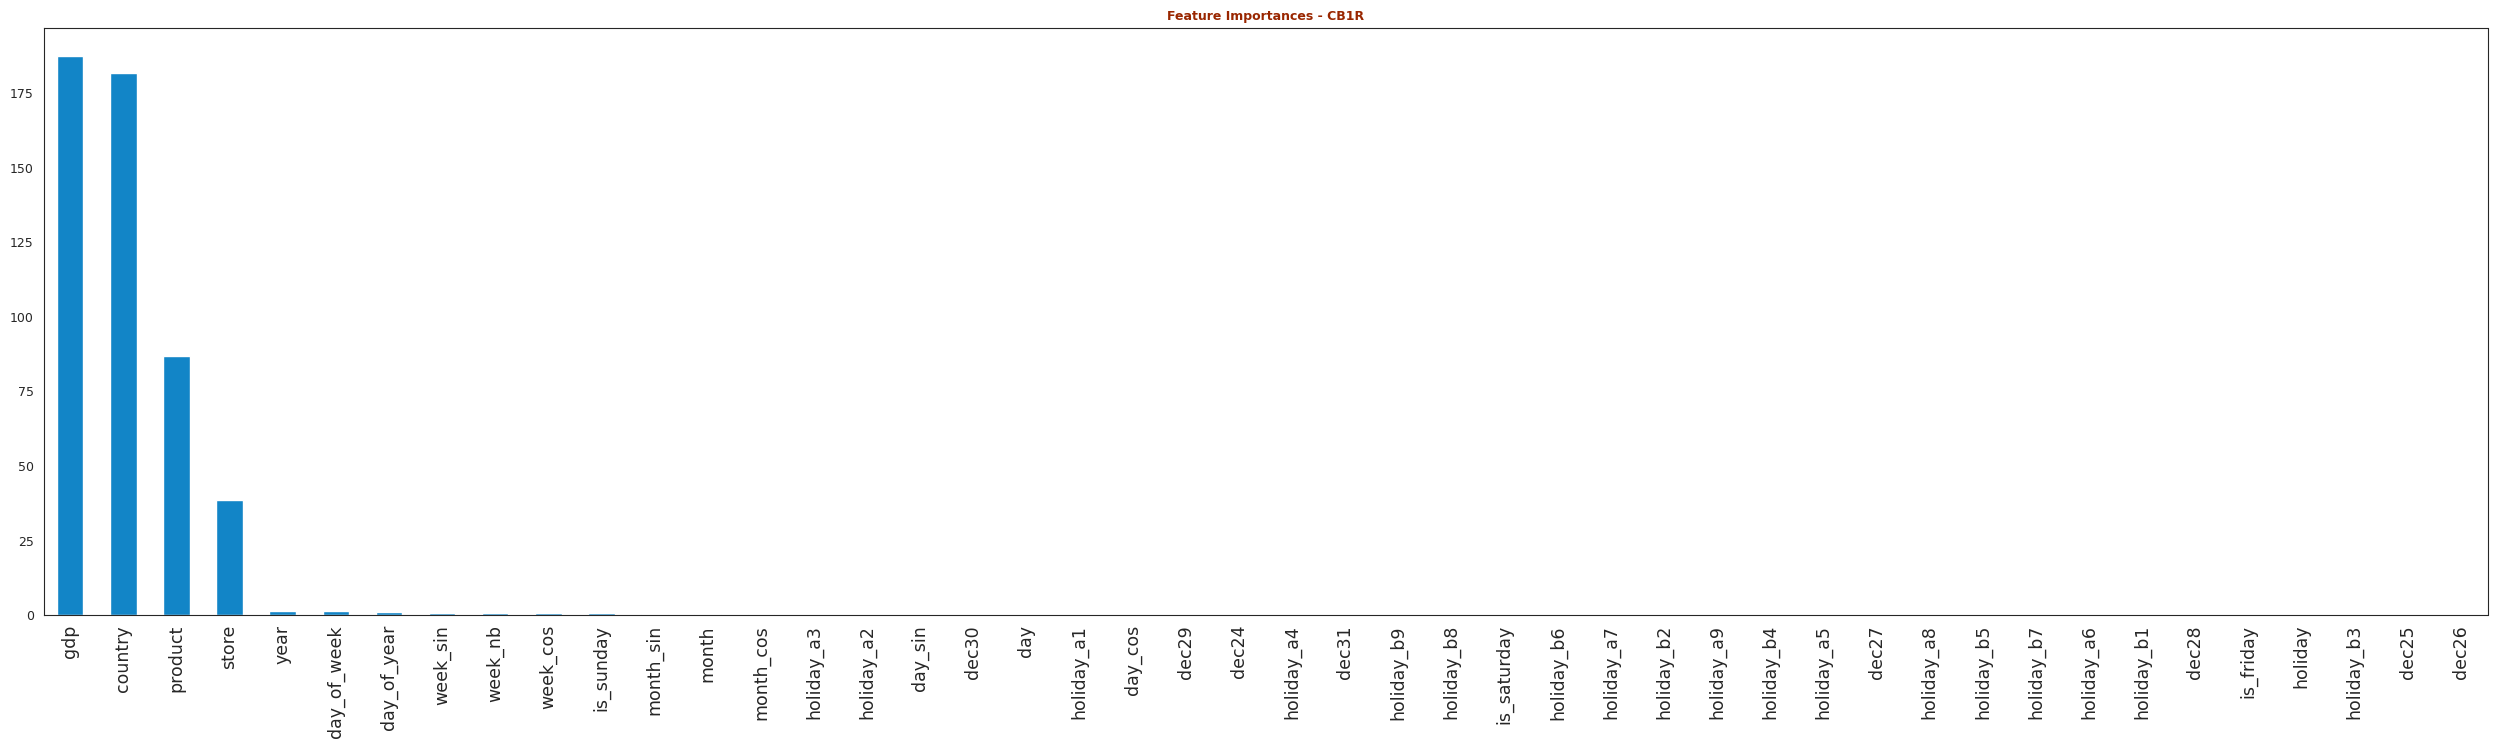



---> 0.008787 +- 0.000026 | OOF
---> 0.008729 +- 0.000026 | Train


==================== LGBM1R MODEL TRAINING ====================

Selected columns = 48


0it [00:00, ?it/s]


---> Shapes = (177007, 46) (177007,) -- (44252, 46) (44252,) -- (98550, 46)
LGBM1R Fold0         OOF = 0.008896 | Train = 0.008725 | Iter = 1,000 

---> Shapes = (177007, 46) (177007,) -- (44252, 46) (44252,) -- (98550, 46)
LGBM1R Fold1         OOF = 0.008831 | Train = 0.008712 | Iter = 1,000 

---> Shapes = (177007, 46) (177007,) -- (44252, 46) (44252,) -- (98550, 46)
LGBM1R Fold2         OOF = 0.008851 | Train = 0.008688 | Iter = 1,000 

---> Shapes = (177007, 46) (177007,) -- (44252, 46) (44252,) -- (98550, 46)
LGBM1R Fold3         OOF = 0.008832 | Train = 0.008646 | Iter = 1,000 

---> Shapes = (177008, 46) (177008,) -- (44251, 46) (44251,) -- (98550, 46)
LGBM1R Fold4         OOF = 0.008782 | Train = 0.008659 | Iter = 1,000 




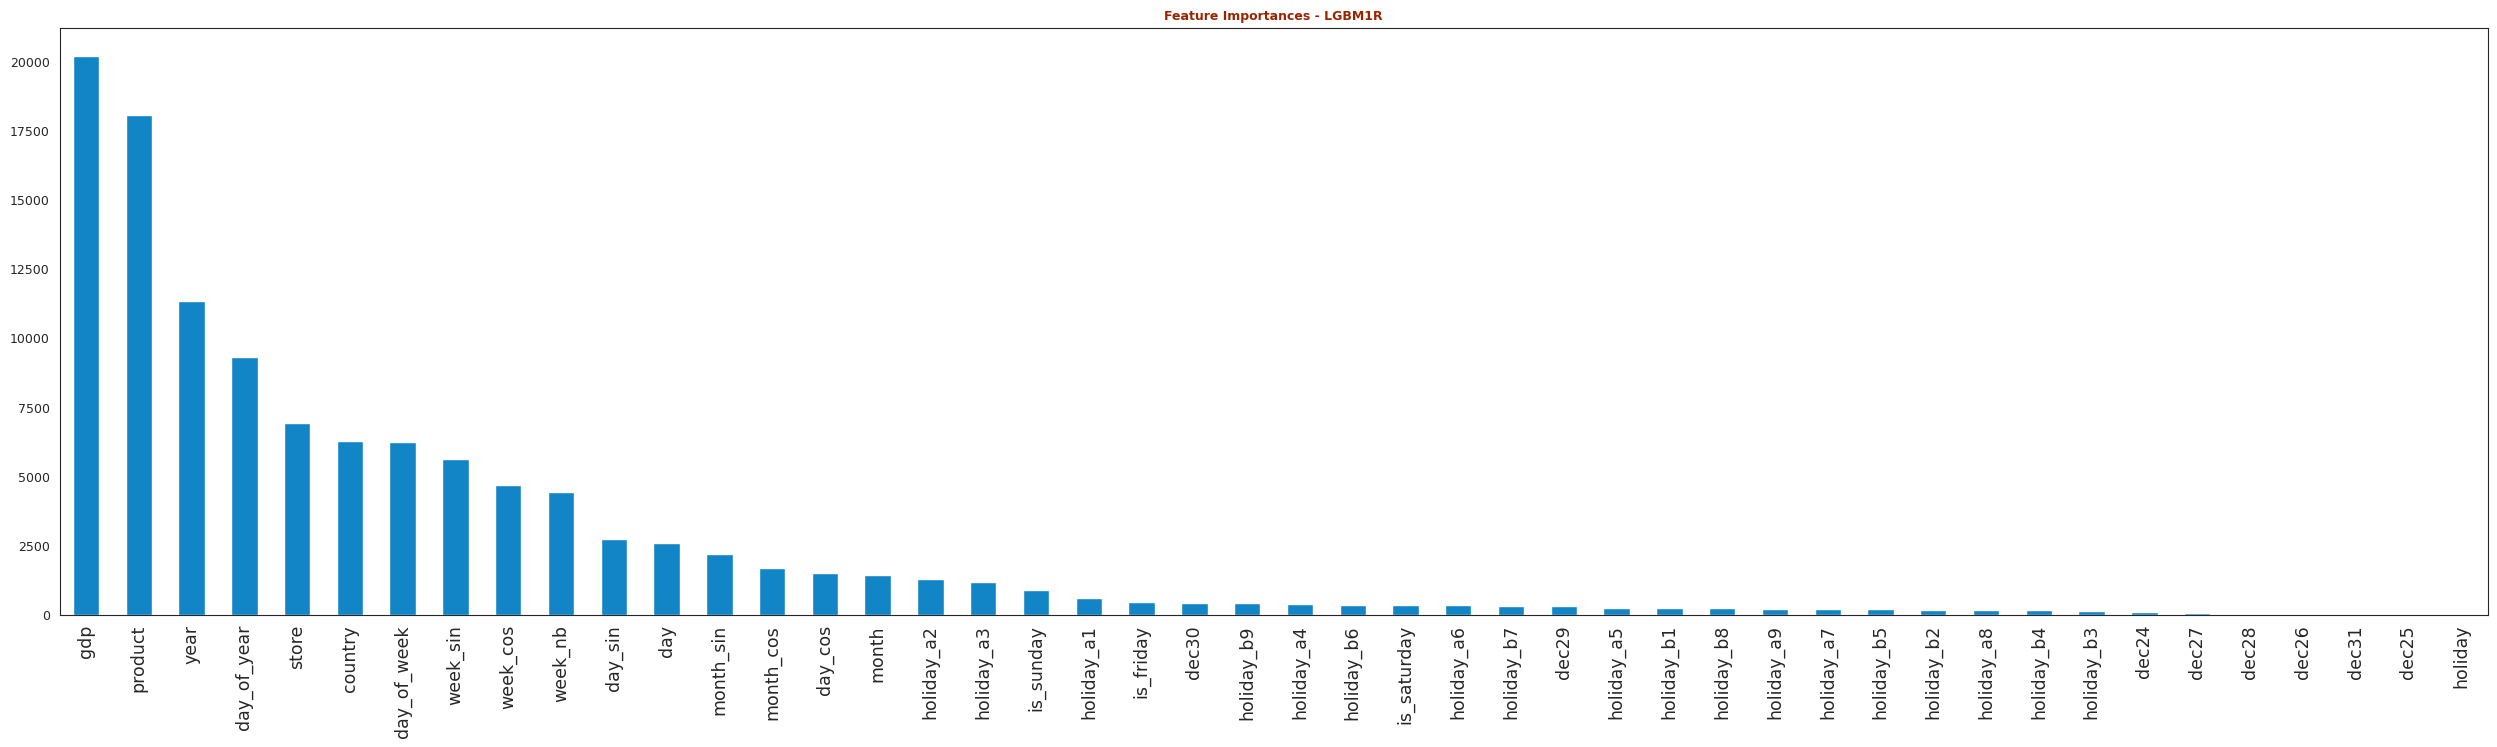



---> 0.008838 +- 0.000037 | OOF
---> 0.008686 +- 0.000030 | Train

CPU times: user 24min 13s, sys: 46.9 s, total: 25min
Wall time: 10min 17s


In [26]:
%%time

# Model training:-
drop_cols = ["Source", "id", "Id", "Label", CFG.target, "fold_nb",  "date"]

for method, mymodel in tqdm(Mdl_Master.items()):

    PrintColor(f"\n{'=' * 20} {method.upper()} MODEL TRAINING {'=' * 20}\n")

    md = \
    ModelTrainer(
        problem_type   = "regression",
        es             = CFG.nbrnd_erly_stp,
        target         = CFG.target,
        orig_req       = False,
        orig_all_folds = False,
        metric_lbl     = "mape",
        drop_cols      = drop_cols,
        pp_preds       = False,
        )

    sel_mdl_cols = list(Xtest.columns) 
    PrintColor(
        f"Selected columns = {len(sel_mdl_cols) :,.0f}", 
        color = Fore.RED
    )
    SelMdlCols[method] = (sel_mdl_cols, cat_cols)

    Xtrain_ = Xtrain.copy()
    Xtest_  = Xtest.copy()

    if "CB" in method :
        pass
    else:
        Xtrain_[cat_cols] = Xtrain_[cat_cols].astype("category")
        Xtest_[cat_cols]  = Xtest_[cat_cols].astype("category")

    fitted_models, oof_preds, test_preds, ftreimp, mdl_best_iter =  \
    md.MakeOfflineModel(
        Xtrain_,
        ytrain,
        ygrp,
        Xtest_,
        clone(mymodel),
        method,
        test_preds_req   = True,
        ftreimp_plot_req = CFG.ftre_imp_req,
        ntop = 50,
    )

    OOF_Preds[method]    = oof_preds
    Mdl_Preds[method]    = test_preds
    FittedModels[method] = fitted_models
    FtreImp[method]      = ftreimp

    del fitted_models, oof_preds, test_preds, ftreimp, sel_mdl_cols, Xtrain_, Xtest_
    print()
    collect();

_ = utils.CleanMemory();

## **ENSEMBLE**

In [27]:
%%time

oof_preds = \
np.clip(
    np.round(np.expm1(pd.DataFrame(OOF_Preds).mean(axis=1).values),0
            ), 
    a_min = 0, a_max = np.inf
)

score = utils.ScoreMetric(np.expm1(ytrain), oof_preds)
PrintColor(
    f"---> Ensemble OOF score = {score :,.8f}"
)

test_preds = \
np.clip(
    np.round(np.expm1(pd.DataFrame(Mdl_Preds).mean(axis=1).values),0
            ), 
    a_min = 0, a_max = np.inf
)


---> Ensemble OOF score = 0.04620898
CPU times: user 58.6 ms, sys: 8.02 ms, total: 66.6 ms
Wall time: 65.6 ms


## **PREDICTION VISUALS**

0it [00:00, ?it/s]

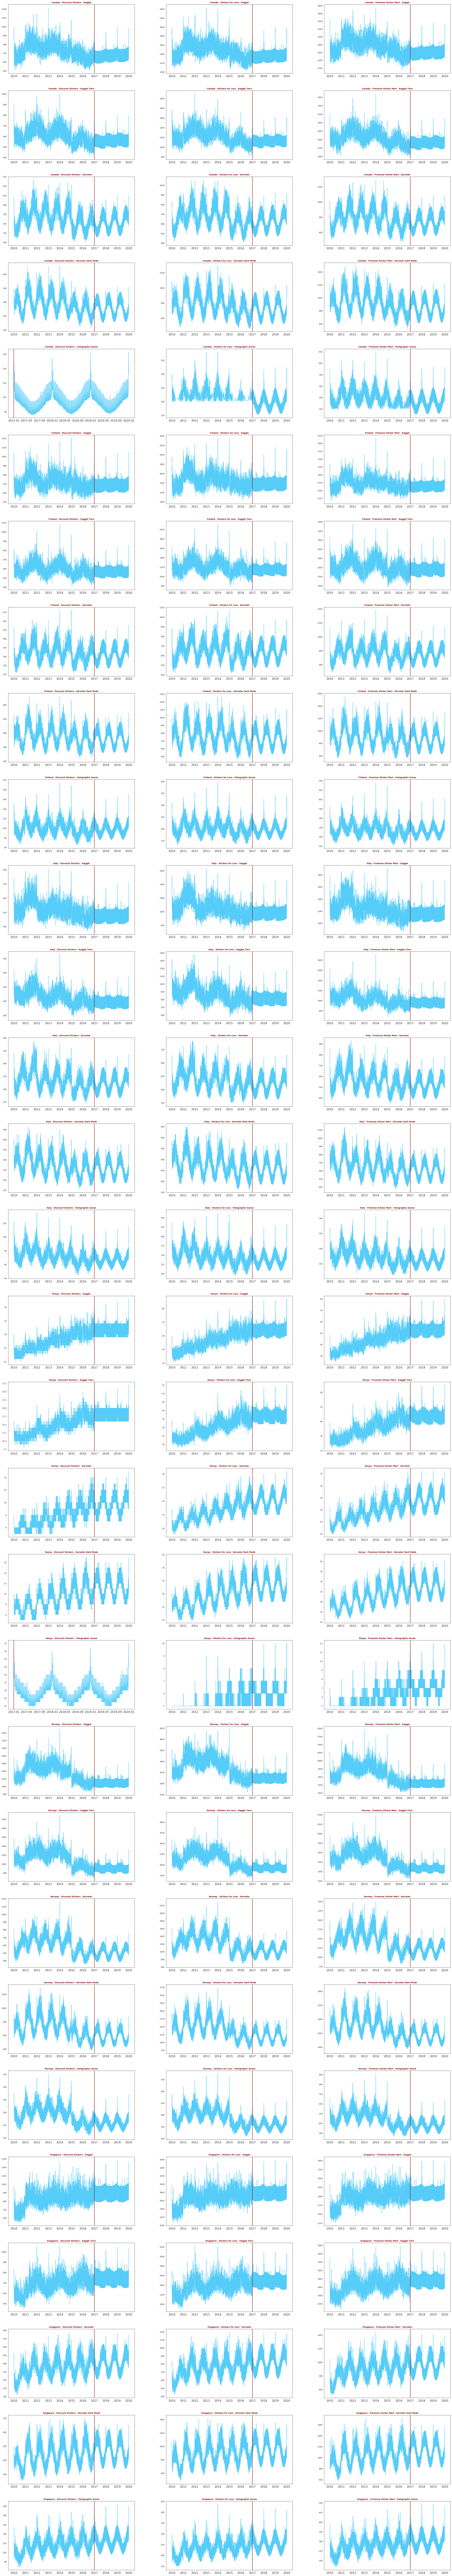

CPU times: user 1min 5s, sys: 14.2 s, total: 1min 19s
Wall time: 58 s


In [28]:
%%time 

df = \
pd.concat(
    [pp.train[["date", "country", "store", "product", CFG.target]],
     pp.test[["date", "country", "store", "product",]].assign(**{CFG.target : test_preds})
    ], axis=0, ignore_index = True
).dropna(subset = [CFG.target], axis=0)

all_combs = list(product(df.country.unique(), df["product"].unique(), df.store.unique()))

with sns.axes_style("white"):
    fig, axes = plt.subplots(30, 3, 
                             figsize = (36, 210), 
                             gridspec_kw = {"hspace" : 0.25 , "wspace" : 0.25}
                            )

    for i, (c, p, s) in tqdm(enumerate(all_combs)) :
        df_1 = df.loc[(df.country == c) & (df["product"] == p) & (df.store == s)]

        ax = axes[i//3, i % 3]
        sns.lineplot(
            data = df_1, 
            x = df_1["date"], 
            y = df_1[CFG.target], 
            color = "#56ccf8", 
            ax = ax
        )
        ax.axvline(x = pd.to_datetime("2016-12-31"), linewidth = 1.5, color = "maroon")
        
        ax.set_title(
            f"{c} - {s} - {p}", fontsize = 9, fontweight = "bold"
        )
        ax.set(xlabel = "", ylabel = "")
        del df_1

    plt.show()

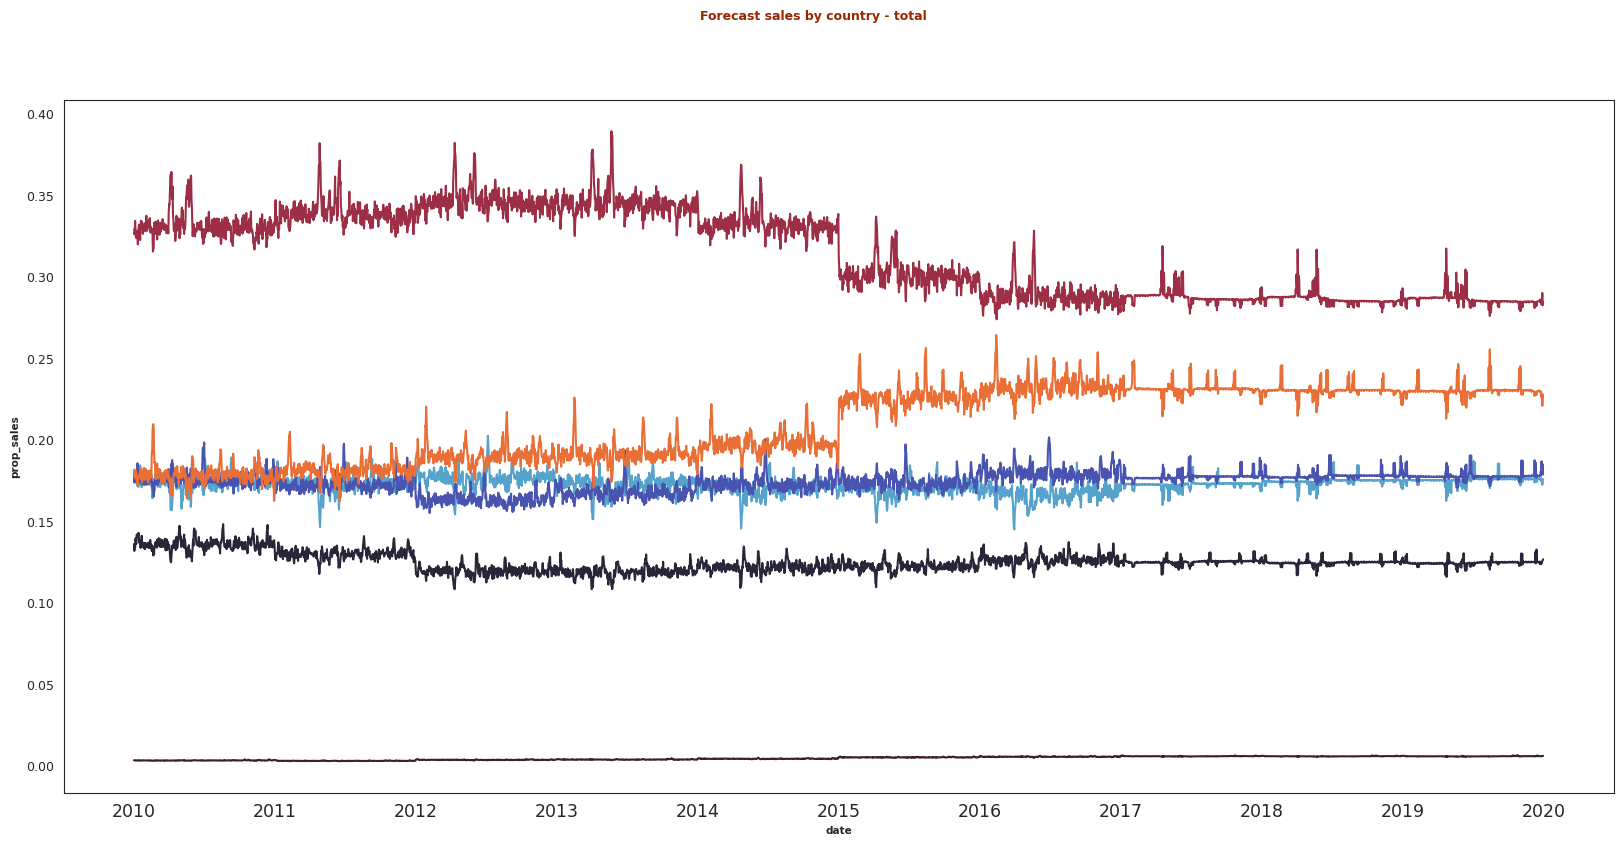

CPU times: user 983 ms, sys: 140 ms, total: 1.12 s
Wall time: 880 ms


In [29]:
%%time 

# Plotting by country total sales
df_1 = df.groupby(["date", "country"])[CFG.target].sum().reset_index()
df_2 = df.groupby(["date",])[CFG.target].sum().reset_index()
df_1 = df_1.merge(df_2, how = "left", on = ["date"])
df_1["prop_sales"] = df_1[f"{CFG.target}_x"] / df_1[f"{CFG.target}_y"]

with sns.axes_style("white") :
    fig, ax = plt.subplots(1,1, figsize = (20, 9))
    colors  = sns.color_palette("icefire", n_colors = 6)

    for j, country in enumerate(df_1.country.unique()) :
        df_2 = df_1.loc[df_1.country == country, ["date", "prop_sales"]]
        
        sns.lineplot(
            data = df_2, 
            x = "date",
            y = "prop_sales", 
            color = colors[j], 
            ax = ax,
        )
  
    plt.suptitle(
        f"Forecast sales by country - total", **CFG.title_specs
    )
    plt.show()

# **SUBMISSION**

In [30]:
%%time

pp.sub_fl[CFG.target] = np.int16(test_preds)
pp.sub_fl.to_csv("submission.csv", index = True)

!ls
print()
!head submission.csv

catboost_info  __notebook__.ipynb  submission.csv  xgb_optimize.log

id,num_sold
230130,148
230131,892
230132,747
230133,404
230134,476
230135,296
230136,1781
230137,1495
230138,822
CPU times: user 99.2 ms, sys: 128 ms, total: 227 ms
Wall time: 516 ms
